# Задание №2

ФИО - Иванов Илья Игоревич

Вариант - 8

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Введение:

Обработайте данные по следующему датасету.
Варианты:
1. chili_cafe.csv
2. users_profi.csv
3. food.csv  (установить параметр low_memory=False при чтении файла)
4. euro_team.csv
5. fantasy_army.csv
6. cars.csv
7. baby_names.csv
8. online_retail.csv (установить параметр encoding = 'latin1' при чтении файла)
9. tips.csv
10. population.csv

Примечание. Все графики должны иметь заголовки, подписи осей и при необходимости легенду
### Шаг 1. Импортируйте необходимые библиотеки

In [ ]:
!pip install wordcloud

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd
import numpy as np

In [ ]:
# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')

### Шаг 2. Импортируйте данные для обработки  и сохраните в отдельную переменную

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Datasets/online_retail.csv', encoding = 'latin1')
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France


### Шаг 3. Выведите первые 10 записей

In [ ]:
data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/10 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/10 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/10 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/10 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/10 8:34,1.69,13047.0,United Kingdom


In [ ]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
'''from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in data.select_dtypes(include='object'):
    data[col] = le.fit_transform(data[col])
data'''

"from sklearn.preprocessing import LabelEncoder\n\nle = LabelEncoder()\n\nfor col in data.select_dtypes(include='object'):\n    data[col] = le.fit_transform(data[col])\ndata"

### Шаг 4.Выведите тепловую карту корреляции признаков в наборе данных (в случае большого количества признаков, ограничте их количество)

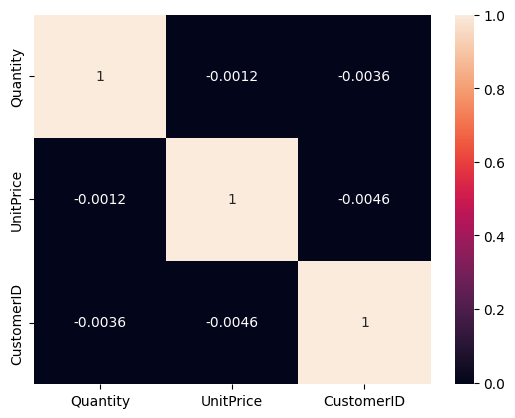

In [ ]:
sns.heatmap(data.corr(), annot=True)
plt.show()

### Шаг 5. Выведите облако слов для любого столбца с категориальными значениями (количество уникальных значений более 2)

https://matplotlib.org/stable/tutorials/colors/colormaps.html

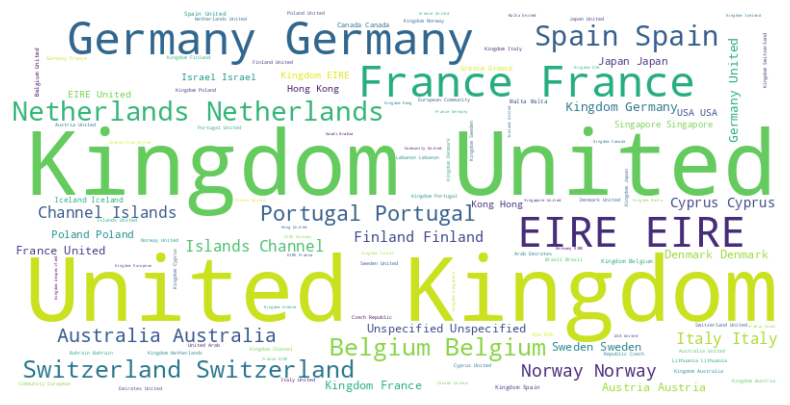

In [ ]:
# Select a column with categorical values
column_name = 'Country'

# Filter out rows with missing values
df_filtered = data[data[column_name].notna()]

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df_filtered[column_name]))

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Шаг 6.  По вариантам:

Вариант 1. Создайте столбиковую диаграмму, отображающую по возрастанию ТОП-5 самых заказываемых товаров

Вариант 2. Создайте круговую диаграмму, отображающую количество мужчин и женщин в процентах

Вариант 3. Создайте столбиковую диаграмму, отображающую по возрастанию ТОП-10 самых распространенных товаров в наборе данных

Вариант 4. Создайте столбиковую диаграмму, отображающую по убыванию количество игроков в каждой команде. Примечание. По каждой команде выводить ее название.

Вариант 5. Создайте круговую диаграмму, отображающую общее количество убитых по каждому полку. Примечание. Необходимо сгруппировать данные по столбцу regiment

Вариант 6. Создайте круговую диаграмму, отображающую количество машин в наборе данных по каждой марке.  

Вариант 7. Создайте круговую диаграмму, отображающую количество мальчиков и девочек в наборе данных.  

Вариант 8. Создайте столбиковую диаграмму, отображающую количество покупателей по каждой стране в наборе данных

Вариант 9. Создайте круговую диаграмму, отображающую, кто больше дает чаевые: курящие люди или ведущие здоровый образ жизни?

Вариант 10. Создайте столбиковую диаграмму, отображащую прирост населения по странам Африки в 2021 году


In [ ]:
data["Country"].nunique()

38

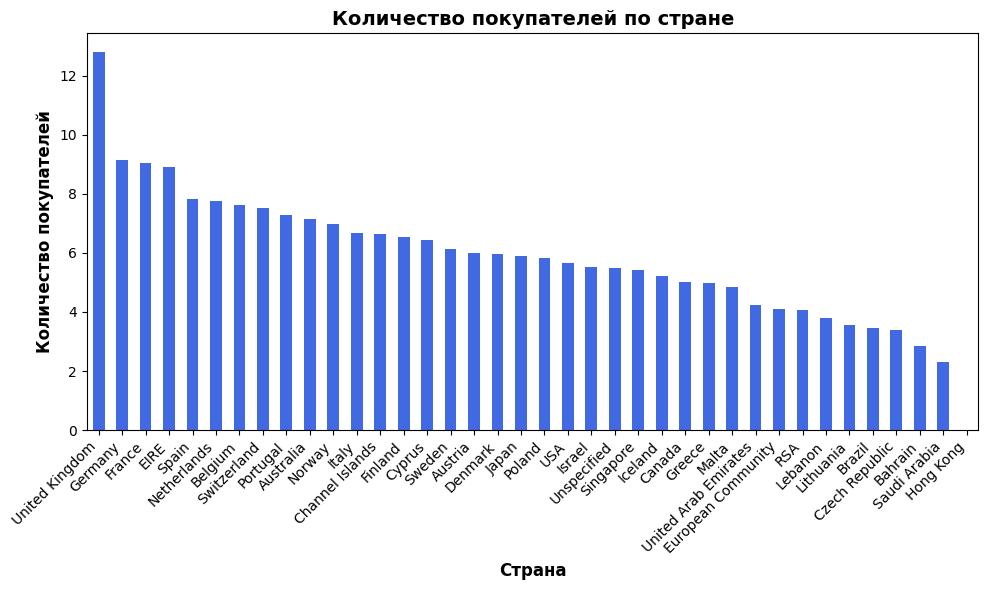

In [ ]:
# Group the data by country and count the number of customers
customer_count_by_country = data.groupby("Country")["CustomerID"].count()

# Sort the countries by count the number of customers in descending order
customer_count_by_country  = customer_count_by_country.sort_values(ascending=False)

customer_count_by_country = np.log(customer_count_by_country)
# Create a bar chart

fig, ax = plt.subplots(figsize=(10, 6))
customer_count_by_country.plot(kind="bar", color="royalblue", ax=ax)

# Add labels and title
ax.set_xlabel("Страна", fontweight="bold", fontsize=12)
ax.set_ylabel("Количество покупателей", fontweight="bold", fontsize=12)
ax.set_title("Количество покупателей по стране", fontweight="bold", fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Show the plot
plt.tight_layout()
plt.show()

### Шаг 7. По вариантам:

Вариант 1. Создайте диаграмму рассеяния с количеством заказанных товаров по цене заказа.
Подсказка: Цена должна быть указана по оси X, а товары, заказанные по оси Y

Вариант 2. Создайте столбиковую диаграмму, отобращающую по каждой профессии средний возраст работника

Вариант 3. Создайте диаграмму, отображающую количество товаров добавленных в текущий набор данных по годам

Вариант 4. Создайте диаграмму рассеяния по количеству ударов в створ ворот и ударов вне створа для каждой команды игроков

Вариант 5. Создайте столбиковую диаграмму, отображающую по каждому полку общее количество бойцов и общее количество убитых

Вариант 6. Создайте диаграмму рассеяния по количеству расхода топлива и лошадинным силам автомобилей

Вариант 7. Постройте линейный график по двум семантическим группам (мальчики и девочки) - рождаемость мальчиков и девочек по годам

Вариант 8.  Постройте диаграмму, отображающую общую суммарную прибыль Интернет-магазина, полученную по каждой стране

Вариант 9. Постройте диаграмму, отображающую средний чек по отдельному дню недели, отсортированную по убыванию.
Дни недели должны быть выведны на русском языке

Вариант 10. Постройте линейный график для стран ТОП-5 с максимальным приростом населения по всем годам из предложенного набора


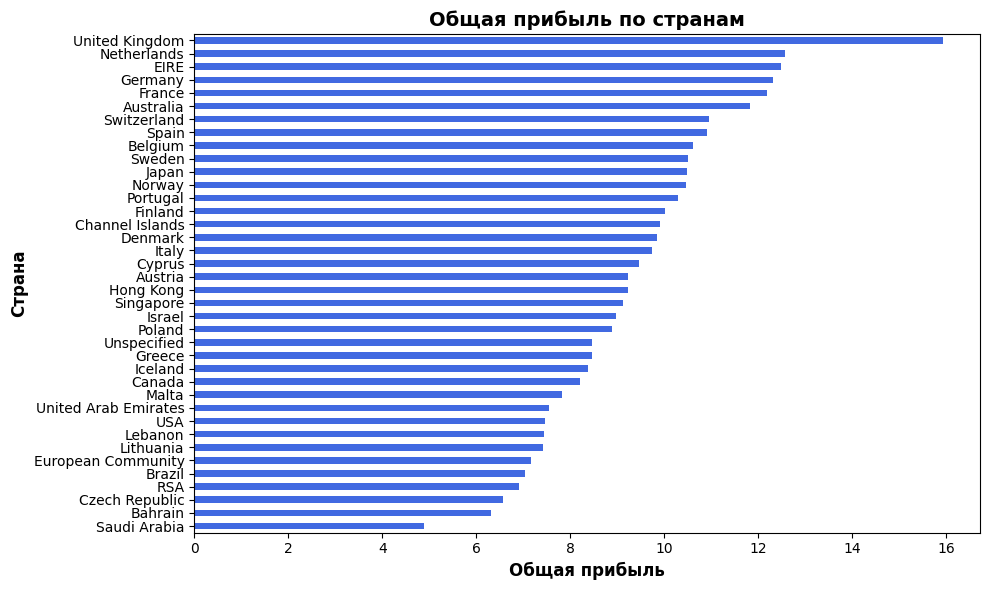

In [ ]:
# Преобразуем тип данных столбца UnitPrice в float64
data["UnitPrice"] = data["UnitPrice"].astype(float)

# Вычисляем общую прибыль для каждой страны
profit_by_country = (data["UnitPrice"] * data["Quantity"]).groupby(data["Country"]).sum()

# Сортируем страны по убыванию прибыли
profit_by_country = profit_by_country.sort_values(ascending=False)

profit_by_country = np.log(profit_by_country)

# Создаем горизонтальную столбиковую диаграмму
plt.figure(figsize=(10,6))
profit_by_country.plot(kind="barh", color="royalblue")
plt.title('Общая прибыль по странам', fontweight="bold",fontsize=14)
plt.xlabel('Общая прибыль', fontweight="bold", fontsize=12)
plt.ylabel('Страна', fontweight="bold", fontsize=12)
plt.gca().invert_yaxis()  # инвертируем ось Y, чтобы страны были упорядочены сверху вниз
plt.tight_layout()
plt.show()

### Шаг 8. По вариантам:

Вариант 1. Постройте диаграмму "график с усами", отобрающую информацию о стоимости заказов клиентов.

Вариант 2.  Постройте скрипичную диаграмму (violinplot), отобрающую информацию о возрасте мужчин и женщин

Вариант 3. Постройте диаграмму "график с усами", отображающую информацию о пищевой ценности товаров (nutrition-score-fr_100g), исключая товары не имеющие пищевую ценность.

Вариант 4. Постройте диаграмму о количестве красных и желтых карточках по каждой команде

Вариант 5. Постройте диаграмму рассеяния по количеству солдат в армии и ветеранов.

Вариант 6. Постройте скрипичную диаграмму (violinplot), отобрающую информацию о весе автомобилей для отдельной марки автомобиля

Вариант 7. Построить диаграмму с накоплениями, отображающая по каждому штату количество рожденных мальчиков и девочек

Вариант 8. Постройте диаграмму по странам в порядке убывания количества заказов за  весь временной период, представленный в наборе данных

Вариант 9. Построить диаграмму с накоплениями, отображающая по каждому дню недели, общую сумму прибыли, полученную за завтраки и ужины.

Вариант 10. Построить диаграмму стран, у которых за последние 3 года (представленные в наборе данных) был отрицательный прирост


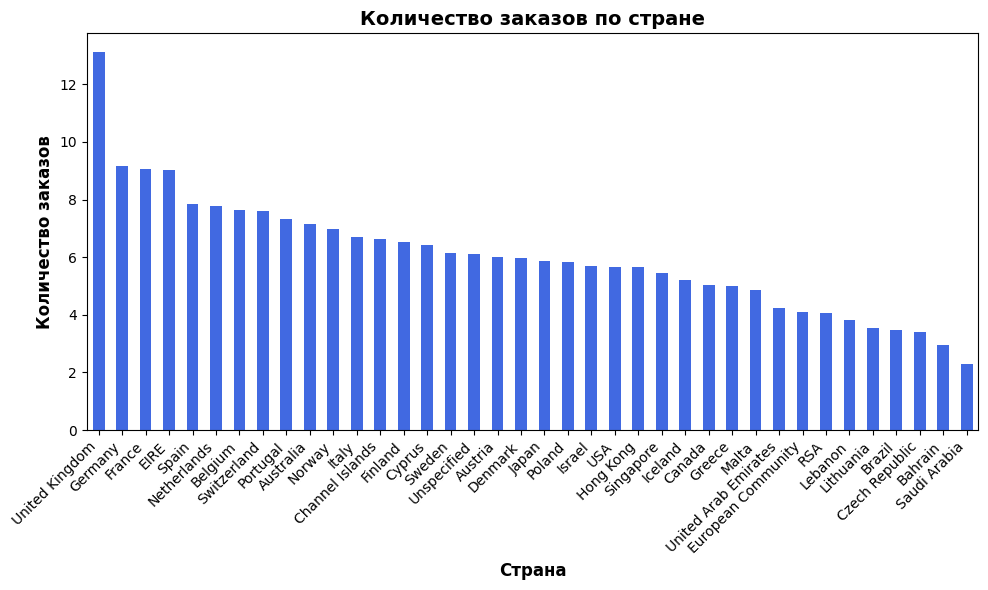

In [ ]:
# Group the data by country and count the number of orders
order_count_by_country = data.groupby("Country")["InvoiceNo"].count()

# Sort the countries by order count in descending order
order_count_by_country = order_count_by_country.sort_values(ascending=False)

order_count_by_country = np.log(order_count_by_country)

# Create a bar chart
fig, ax = plt.subplots(figsize=(10, 6))
order_count_by_country.plot(kind="bar", color="royalblue", ax=ax)

# Add labels and title
ax.set_xlabel("Страна", fontweight="bold", fontsize=12)
ax.set_ylabel("Количество заказов", fontweight="bold", fontsize=12)
ax.set_title("Количество заказов по стране", fontweight="bold", fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Show the plot
plt.tight_layout()
plt.show()

### Шаг 9. По вариантам:

Вариант 1. Построить диаграмму  с общей выручкой по каждой продукту. По оси x - общая выручка, по оси y - название товара

Вариант 2. Построить диаграмму, отображающую информацию по каждой профессии и полу максимальных возраст работников.

Вариант 3.Построить круговую диаграмму с количеством товаров имеющих и не имеющих пищевую ценность в наборе данных

Вариант 4. Постройте диаграмму "график с усами", отобрающую информацию о забитых голах в наборе данных.

Вариант 5. Постройте диаграмму "график с усами", отображающую информацию о количестве дизертиров в армии

Вариант 6. Постройте диаграмму, отображающую ТОП-5 моделей автомобилей с максимальными характеристиками (по лошадинным силам).

Вариант 7. Постройте скрипичную диаграмму (violinplot), отобрающую информацию о рождаемости мальчиков и девочек

Вариант 8. Постройте скрипичную диаграмму (violinplot), отобрающую информацию о стоимостях отдельных заказов

Вариант 9. Постройте скрипичную диаграмму (violinplot), отобрающую информацию о стоимости чека за завтрак и за ужин

Вариант 10. Постройте скрипичную диаграмму (violinplot), отобрающую информацию о приросте населения в 2021 в Европе


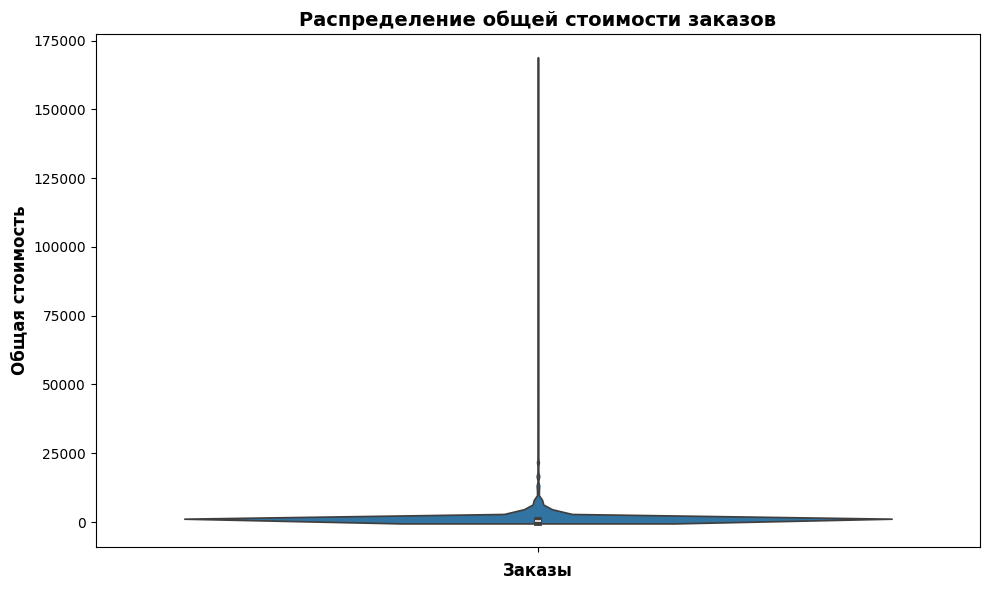

In [ ]:
data = data[(data["UnitPrice"] > 0) & (data["Quantity"] > 0)]

# Умножаем столбец "UnitPrice" на столбец "Quantity"
data["TotalPrice"] = data["UnitPrice"] * data["Quantity"]

# Группируем данные по номеру счета и вычисляем общую стоимость
invoice_totals = data.groupby("InvoiceNo")["TotalPrice"].sum()

# Создаем скрипичную диаграмму
fig, ax = plt.subplots(figsize=(10, 6))
sns.violinplot(y=invoice_totals, ax=ax)

# Добавляем подписи и заголовок на русском языке
ax.set_xlabel("Заказы", fontweight="bold", fontsize=12)
ax.set_ylabel("Общая стоимость", fontweight="bold", fontsize=12)
ax.set_title("Распределение общей стоимости заказов", fontweight="bold", fontsize=14)

# Показываем диаграмму
plt.tight_layout()
plt.show()

### Построить гистограмму распределения частоты встречаемости количества заказов по номеру счёта

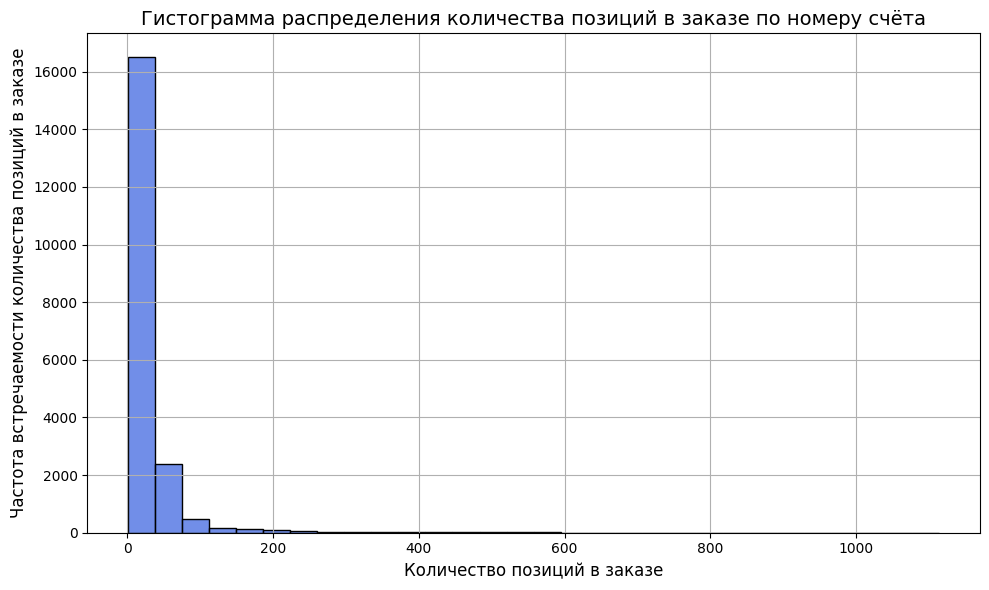

In [ ]:
data = data[data["Quantity"] > 0]

# Сгруппируем данные по InvoiceNo и посчитаем количество позиций в каждом заказе
positions_per_invoice = data.groupby('InvoiceNo').size()

# Построим гистограмму распределения количества позиций в заказе
plt.figure(figsize=(10, 6))
sns.histplot(positions_per_invoice, bins=30, color='royalblue')  # Используем seaborn для построения гистограммы
plt.title('Гистограмма распределения количества позиций в заказе по номеру счёта', fontsize=14)
plt.xlabel('Количество позиций в заказе', fontsize=12)
plt.ylabel('Частота встречаемости количества позиций в заказе', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

### Полезные Интернет-ресурсы

1. https://pythonru.com/biblioteki/seaborn-plot?ysclid=ldb4zpz09d717768797

# Нативная реализация метода StandardScaler() в виде функции

$$scaled\_data = \frac{data - mean(data)}{std(data)}$$$$$$

In [ ]:
import numpy as np

def custom_standard_scaler(data):
    """
    Реализация метода StandardScaler для масштабирования данных.

    Аргументы:
    data: numpy.array или pandas.Series, данные для масштабирования

    Возвращает:
    scaled_data: numpy.array, масштабированные данные
    """
    mean = np.mean(data)
    std = np.std(data)
    scaled_data = (data - mean) / std
    return scaled_data

# Генерируем рандомные данные
np.random.seed(42)
random_data = np.random.randint(0, 100, size=10)

# Применяем нашу нативную реализацию StandardScaler
scaled_data = custom_standard_scaler(random_data)

# Выводим результаты
print("Исходные данные:", random_data)
print("-----------------------------------------------------------------------------------")
print("Масштабированные данные:", scaled_data, np.mean(scaled_data), np.std(scaled_data))

Исходные данные: [51 92 14 71 60 20 82 86 74 74]
-----------------------------------------------------------------------------------
Масштабированные данные: [-0.44934854  1.16672955 -1.90776048  0.33898223 -0.09459969 -1.67126125
  0.77256416  0.93023032  0.45723185  0.45723185] 7.771561172376095e-17 1.0
